In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

[0.27239153 0.20434714 0.11846934 0.08557809 0.07159153]
[[-0.00392945  0.19248721  0.16314874 -0.10613384 -0.15377481 -0.27163577
  -0.29740856 -0.34745645 -0.07971241  0.28262844  0.00637846  0.35775896
  -0.13358354  0.05071112  0.34263174  0.36644494 -0.20991087  0.2697482
  -0.08593617 -0.08871009]
 [ 0.18944966 -0.19607677 -0.09812162  0.35949845  0.26361986 -0.20560341
  -0.0739019   0.10089372  0.11542378 -0.1516591  -0.32820531 -0.19105941
  -0.04201292  0.05691034  0.02378828  0.20121824 -0.39684185  0.33161857
   0.28771921  0.28730776]
 [ 0.51049146 -0.45513684 -0.35446843 -0.19007693 -0.29298387  0.23580792
   0.01528511  0.0616135  -0.25824319  0.0109552  -0.11634064  0.00243703
   0.02052663 -0.12366688  0.2591959   0.07645663 -0.02386506  0.04520364
  -0.03707525 -0.22785069]
 [ 0.11883286 -0.12968334 -0.0720266  -0.14050755  0.14750113 -0.11749389
   0.00517095  0.13561104  0.26071931 -0.11469546 -0.04758695  0.062149
  -0.579835    0.60751951  0.03257181 -0.01408462  

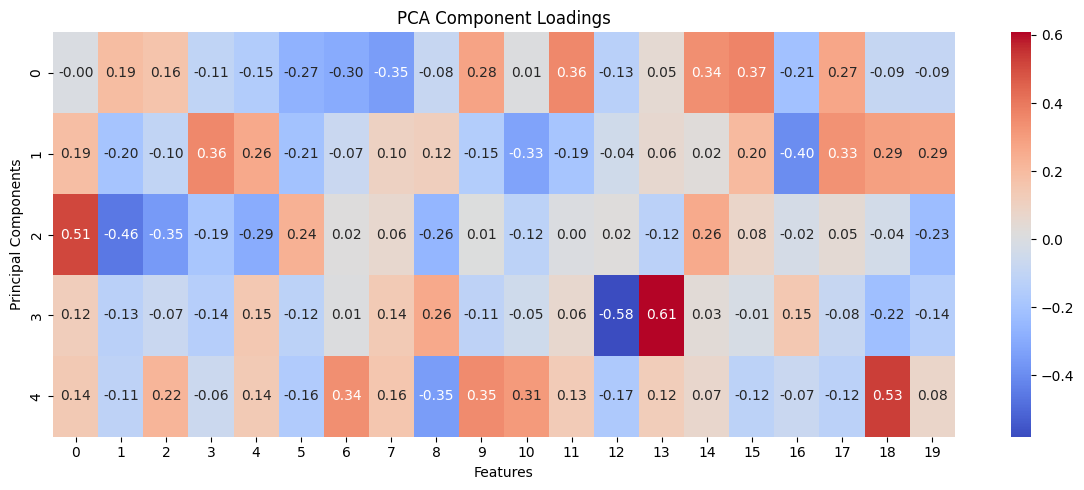

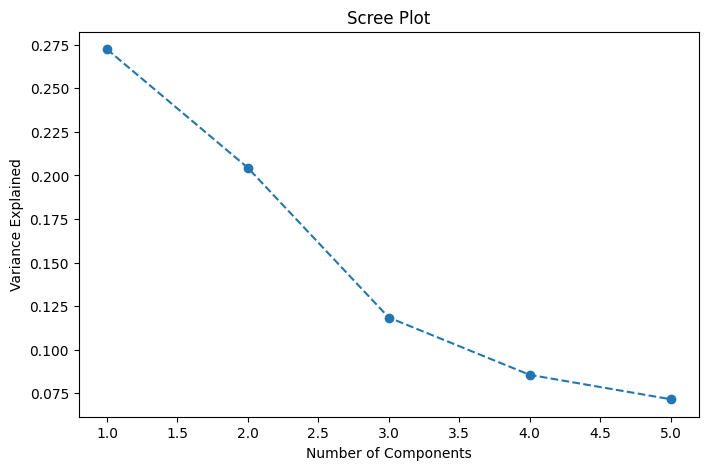

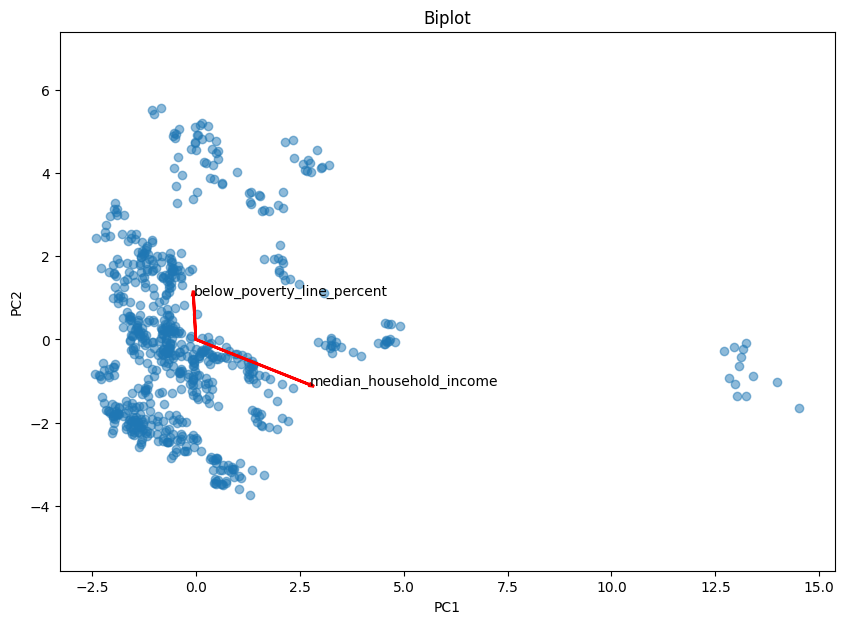

/var/folders/_z/09vrqlq533g4mwf_3hh2dzrc0000gn/T/ipykernel_25758/1612755747.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


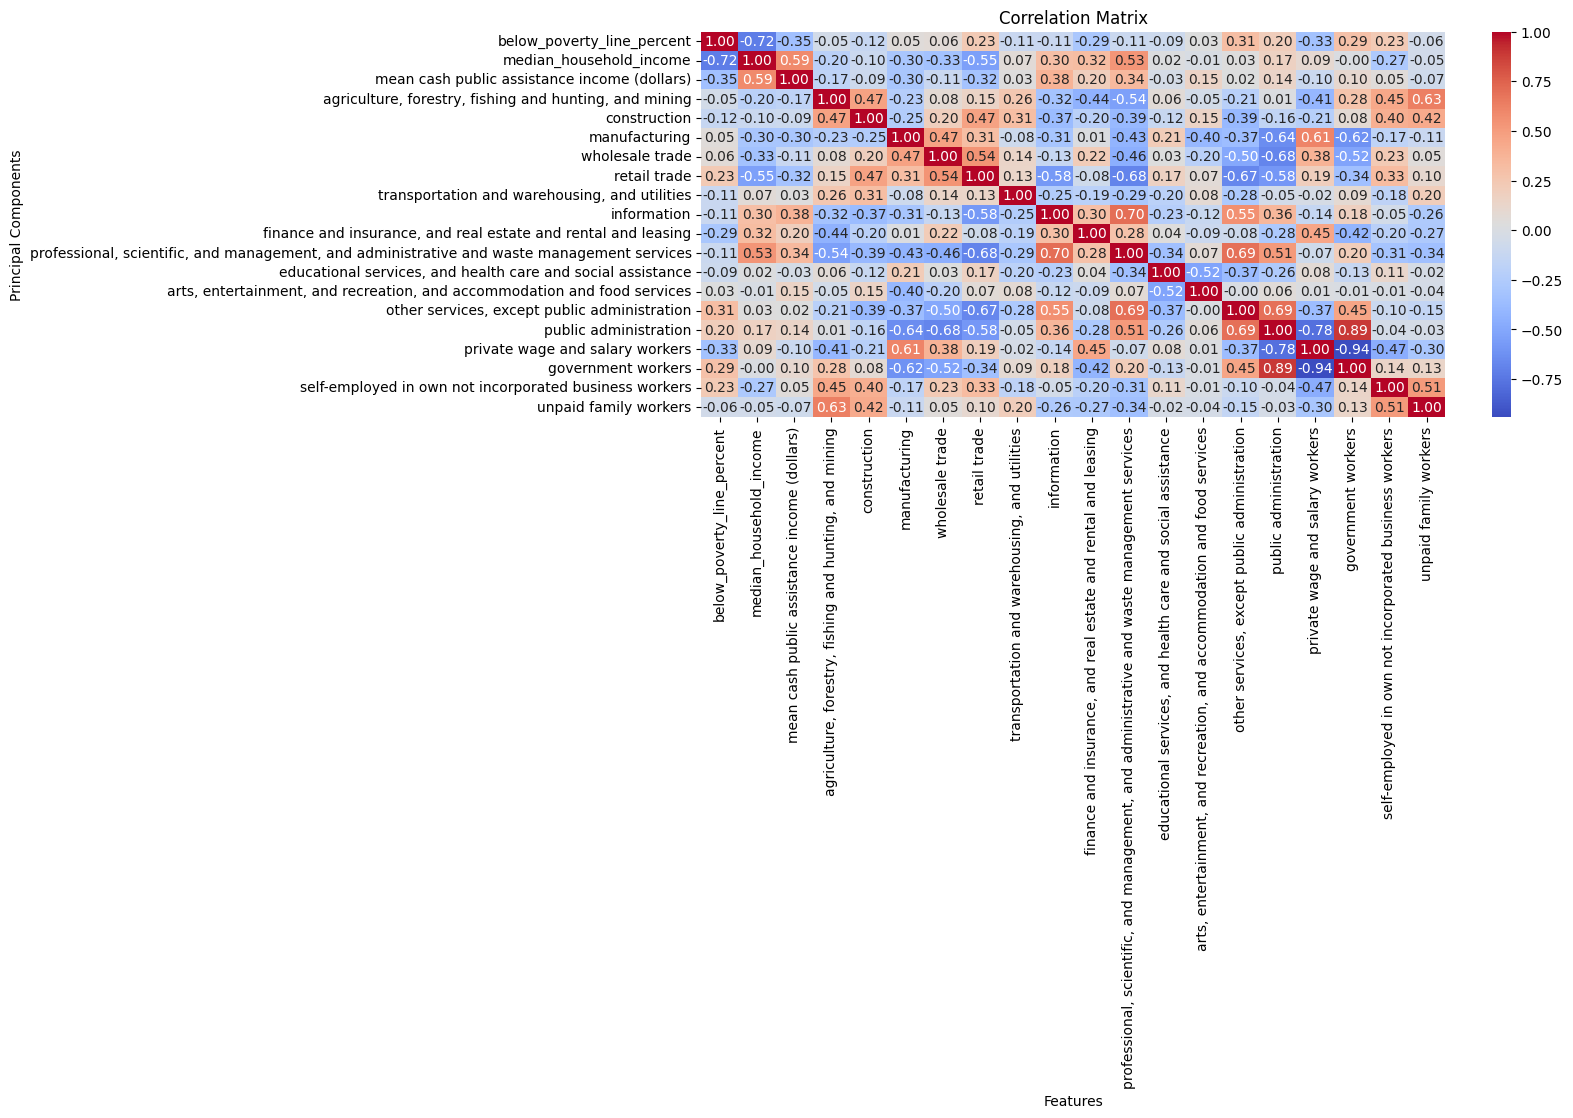

In [31]:
df = pd.read_csv('../udataset/state_data.csv')
df_numeric = df.drop(columns=['state', 'year'])

scaler = StandardScaler()
standardised_data = scaler.fit_transform(df_numeric)

pca = PCA(n_components = 5)
princ_comps = pca.fit_transform(standardised_data)

print(pca.explained_variance_ratio_)
print(pca.components_)

princ_comps2 = pca.components_

df_princ_comp = pd.DataFrame(princ_comps, columns=[f'PC{i+1}' for i in range(princ_comps.shape[1])])
df_princ_comp.to_csv('../udataset/principle_components.csv', index=False)

plt.figure(figsize=(12, 5))  # You can adjust the size as needed
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Component Loadings')
plt.ylabel('Principal Components')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

scores = pca.transform(standardised_data)

plt.figure(figsize=(10,7))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)
for i, v in enumerate(pca.components_[0:2, :]):
    plt.arrow(0, 0, v[0]*max(scores[:,0]), v[1]*max(scores[:,1]), head_width=0.05, head_length=0.1, linewidth=2, color='red')
    plt.text(v[0]*max(scores[:,0]), v[1]*max(scores[:,1]), df_numeric.columns[i], color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot')
plt.axis('equal')
plt.show()

plt.figure(figsize=(12, 5))  # You can adjust the size as needed
corr_mat = df_numeric.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.ylabel('Principal Components')
plt.xlabel('Features')
plt.tight_layout()
plt.show()
